## imports

In [1]:
import pandas as pd
from pathlib import Path
from collections import Counter
from aging.behavior.syllables import relabel_by_usage, assign_onsets

In [2]:
def mouse_map(string):
    """returns mouse identity"""
    if "long-3-0" in string:
        return "03_01"
    if "long-3-1" in string:
        return "03_02"
    if "long-4-1" in string:
        return "04_02"
    if "nt" in string:
        m = "_01"
    elif "RL" in string:
        m = "_04"
    elif "R" in string:
        m = "_02"
    elif "L" in string:
        m = "_03"
    if "ong4" in string:
        return "04" + m
    if "ong3" in string:
        return "03" + m
    if "ong2" in string:
        return "02" + m
    if "ong1" in string:
        return "01" + m
    return string[:5]

In [3]:
## for males

In [4]:
## upload data frame females
data_folder = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_08')
path = data_folder / 'longtogeny_males_syllable_df_v00.parquet'
df = pd.read_parquet(path)

## get syllable maps from male ontogeny
def get_usage_map():
    _, usage_map = relabel_by_usage(pd.read_parquet(data_folder / 'ontogeny_males_syllable_df_v00.parquet'), return_map=True)
    return usage_map

df['relabeled_syllables'] = df['syllables'].map(get_usage_map()).astype('int16[pyarrow]')

In [5]:
# calculate age for males
first = pd.Timestamp(year=2021, month=3, day=30)
age = (df.date - first).dt.days + 21
df.age = age
df['age'] = df['age'].astype('int32[pyarrow]')

In [6]:
sorted(df.age.unique())

[21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 42,
 45,
 48,
 55,
 58,
 62,
 66,
 70,
 73,
 76,
 78,
 80,
 83,
 84,
 87,
 90,
 93,
 97,
 100,
 107,
 112,
 114,
 121,
 128,
 135,
 143,
 149,
 157,
 165,
 183,
 194,
 199,
 206,
 215,
 221,
 228,
 243,
 250,
 255,
 270,
 285,
 354,
 360,
 366,
 376,
 381,
 385,
 395,
 404,
 411,
 418,
 431,
 439,
 449,
 460,
 468,
 479,
 488,
 492,
 802,
 814,
 831]

## manual curations

In [7]:
# replace a time stamp where mouse 04_03 is accidently marked as 03_03
t1 = pd.Timestamp("2021-04-03 17:46:45")
df.loc[df.date == t1, "subject_name"] = "04_03_025"

In [8]:
# remove session copies that i think are females - and save in a diff dataframe
# have the same date but different sessions number - 60 instead of 102

fsessions = [
    pd.Timestamp("2021-10-01 15:47:32"),
    pd.Timestamp("2021-10-01 16:46:10"),
    pd.Timestamp("2021-10-01 17:22:43"),
    pd.Timestamp("2021-10-01 16:17:56"),
    pd.Timestamp("2021-10-01 17:50:37"),
]
extra_females = df[df.date.isin(fsessions)]
extra_females.to_parquet(
    data_folder / "longtogeny_extra_females.parquet", engine="pyarrow"
)

In [9]:
session_length = df.groupby("uuid", sort=False)["timestamps"].max()

In [10]:
keep_uuids = session_length[session_length.between(600, 1250)].index
df = df[~df.date.isin(fsessions) & df["uuid"].isin(keep_uuids)].copy()

<Axes: >

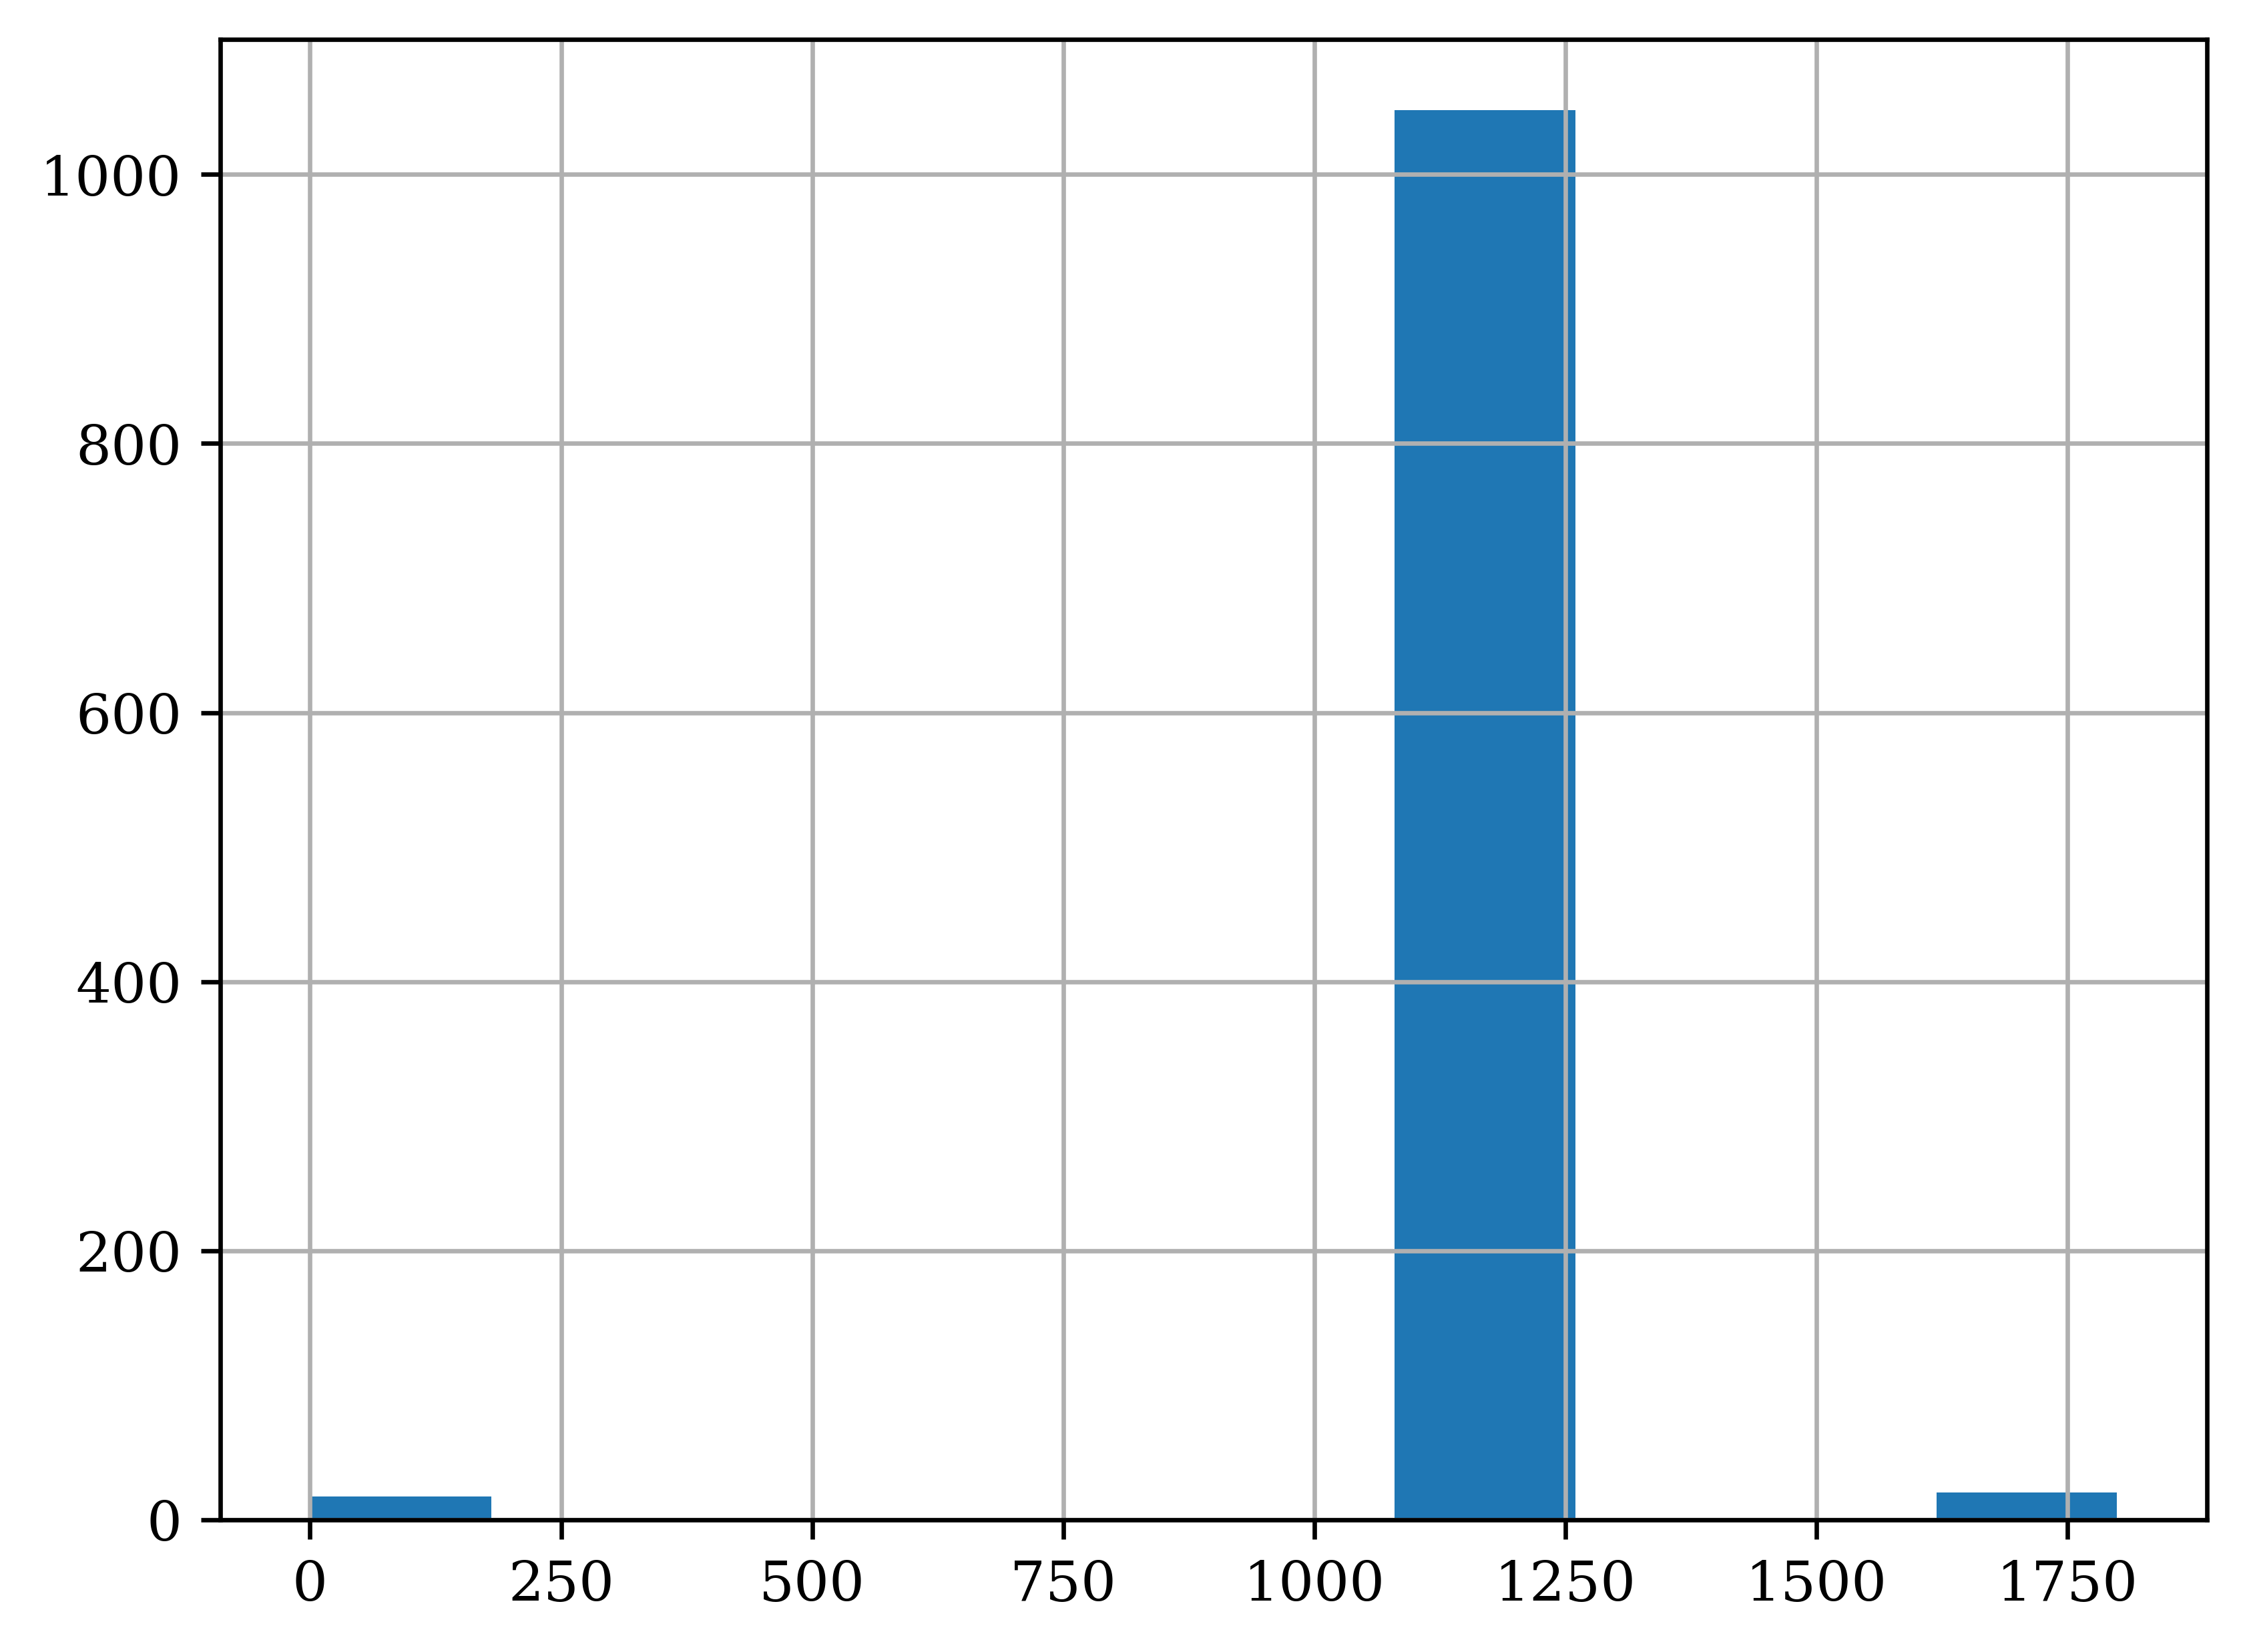

In [11]:
# clean up the data by removing short sessions
session_length.hist()

<Axes: >

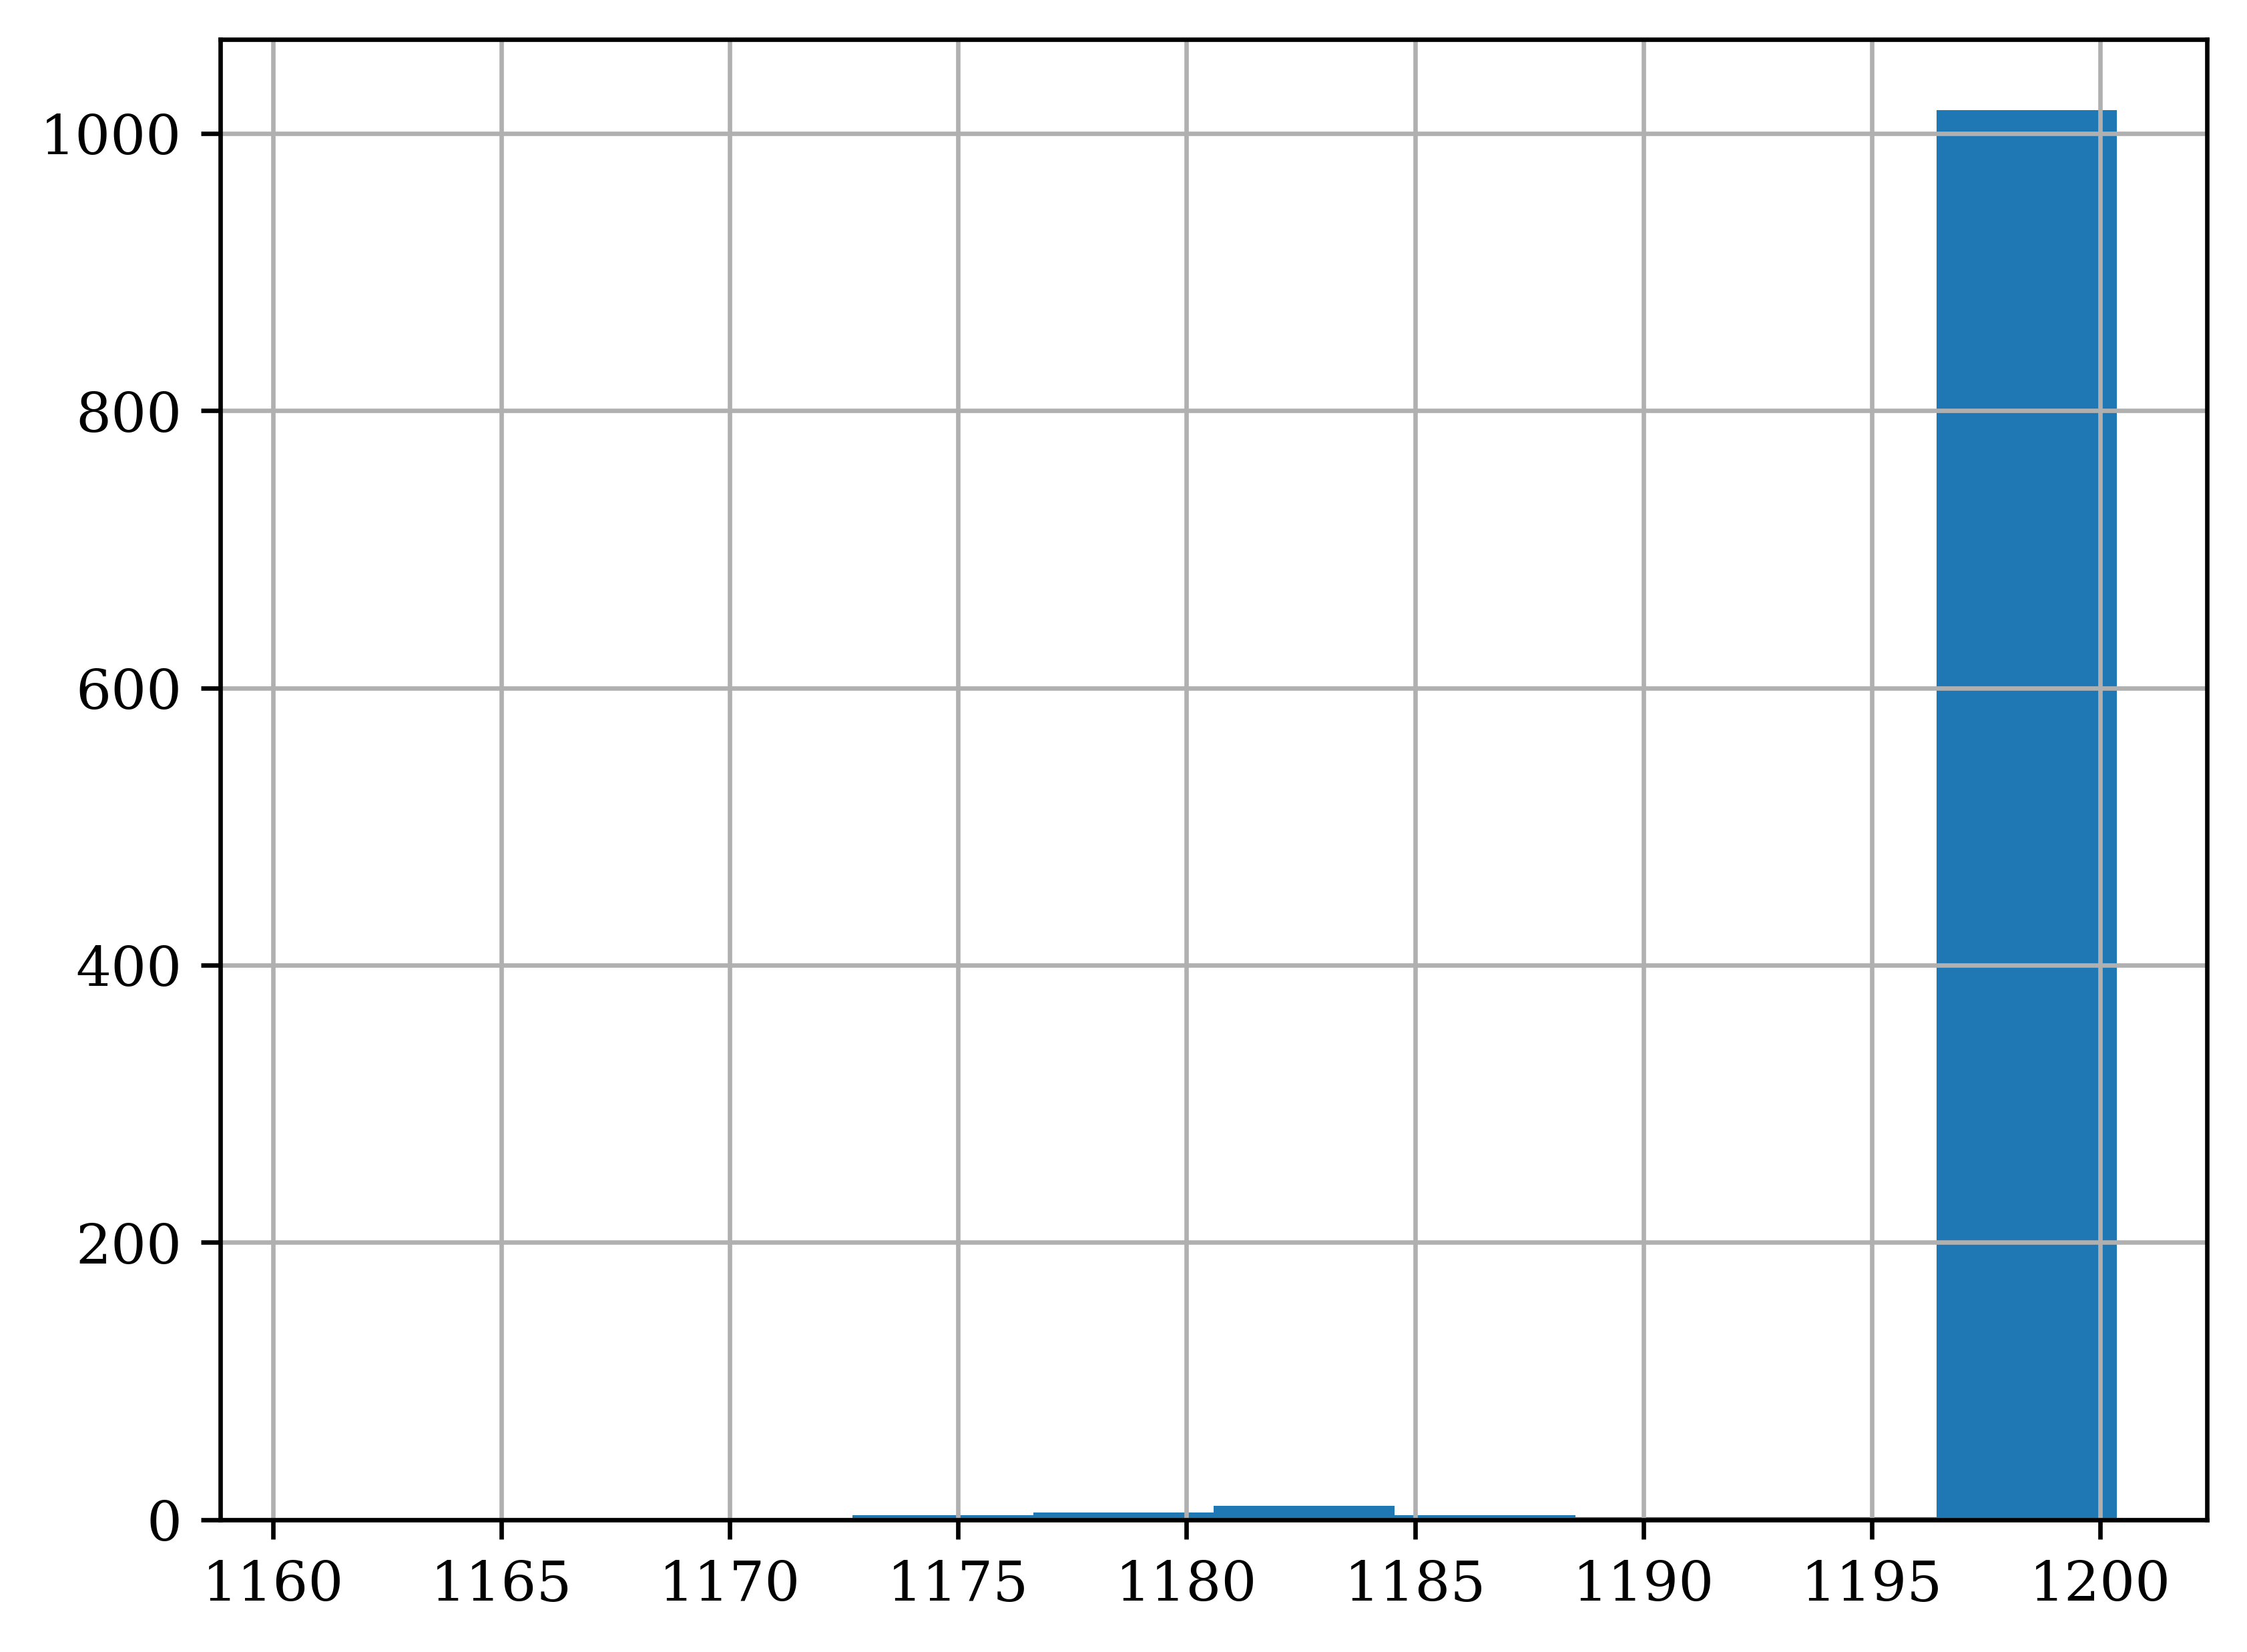

In [12]:
# after removing sessions
session_length = df.groupby("uuid", sort=False)['timestamps'].max()
session_length.hist()

In [13]:
# remove duplicated files due to cleaning extractions
new_df = []
for (date, subject), _df in df.groupby(['date', 'subject_name'], sort=False):
    if _df['uuid'].nunique() > 1:
        _df = _df[_df['file'].str.contains('proc_cleaned')]
    new_df.append(_df)
    
df = pd.concat(new_df)

## get mouse names

In [14]:
sorted(df['subject_name'].unique())

['01_01_021',
 '01_01_022',
 '01_01_024',
 '01_01_025',
 '01_01_026',
 '01_01_027',
 '01_01_028',
 '01_01_029',
 '01_01_030',
 '01_01_031',
 '01_01_032',
 '01_01_035',
 '01_01_036',
 '01_01_037',
 '01_01_038',
 '01_01_039',
 '01_01_040',
 '01_01_041',
 '01_01_042',
 '01_01_043',
 '01_01_044',
 '01_01_045',
 '01_01_046',
 '01_01_047',
 '01_01_050',
 '01_01_051',
 '01_01_060',
 '01_01_070',
 '01_01_071',
 '01_01_085',
 '01_01_089',
 '01_01_090',
 '01_01_099',
 '01_01_100',
 '01_01_101',
 '01_01_102',
 '01_01_103',
 '01_01_104',
 '01_01_105',
 '01_01_110',
 '01_01_120',
 '01_01_200',
 '01_01_201',
 '01_01_202',
 '01_01_203',
 '01_01_204',
 '01_01_205',
 '01_01_206',
 '01_01_207',
 '01_01_208',
 '01_01_209',
 '01_01_210',
 '01_01_211',
 '01_01_212',
 '01_01_213',
 '01_01_214',
 '01_01_215',
 '01_01_216',
 '01_01_217',
 '01_01_23',
 '01_01_300',
 '01_01_80',
 '01_02_021',
 '01_02_022',
 '01_02_023',
 '01_02_024',
 '01_02_025',
 '01_02_026',
 '01_02_027',
 '01_02_031',
 '01_02_032',
 '01_02_

In [15]:
# calculate mouse identity
df['mouse'] = df['subject_name'].map(mouse_map)

In [16]:
sorted(df['mouse'].unique())

['01_01',
 '01_02',
 '01_03',
 '01_04',
 '02_01',
 '02_02',
 '02_03',
 '02_04',
 '03_01',
 '03_02',
 '03_03',
 '03_04',
 '04_01',
 '04_02',
 '04_03',
 '04_04',
 'C01_m',
 'C02_m',
 'C03_m',
 'C04_m',
 'C05_m',
 'C06_m',
 'C07_m',
 'C08_m']

In [17]:
## keep only mice that are part of the male experiment
keep_mice = [
    "01_01",
    "01_02",
    "01_03",
    "01_04",
    "02_01",
    "02_02",
    "02_03",
    "02_04",
    "03_01",
    "03_02",
    "03_03",
    "03_04",
    "04_01",
    "04_02",
    "04_03",
    "04_04",
]
df = df[df["mouse"].isin(keep_mice)].reset_index()

In [18]:
# calculate usage
usage_df = (
    df.query("onsets")
    .groupby(["age", "uuid", "mouse", "subject_name", "date"])["relabeled_syllables"]
    .value_counts(normalize=True)
)
usage_df.name = "usage"
usage_df = usage_df.reset_index()

In [19]:
## remove sessions were a syllable occours more than x% of time
thresh = 0.2
syll_usage = usage_df.groupby("uuid", sort=False)["usage"].max()
remove_uuids = syll_usage[syll_usage > thresh].to_frame().reset_index()["uuid"]
usage_df = usage_df[~usage_df["uuid"].isin(remove_uuids)]

In [20]:
# find ages where less than 9 data points exists and filter them out (not sure we want that)
temp = (
    usage_df.pivot_table(
        values="usage",
        columns="relabeled_syllables",
        index=["age", "uuid", "subject_name", "date"],
    )
    .fillna(0)
    .reset_index()
)

<Axes: xlabel='age'>

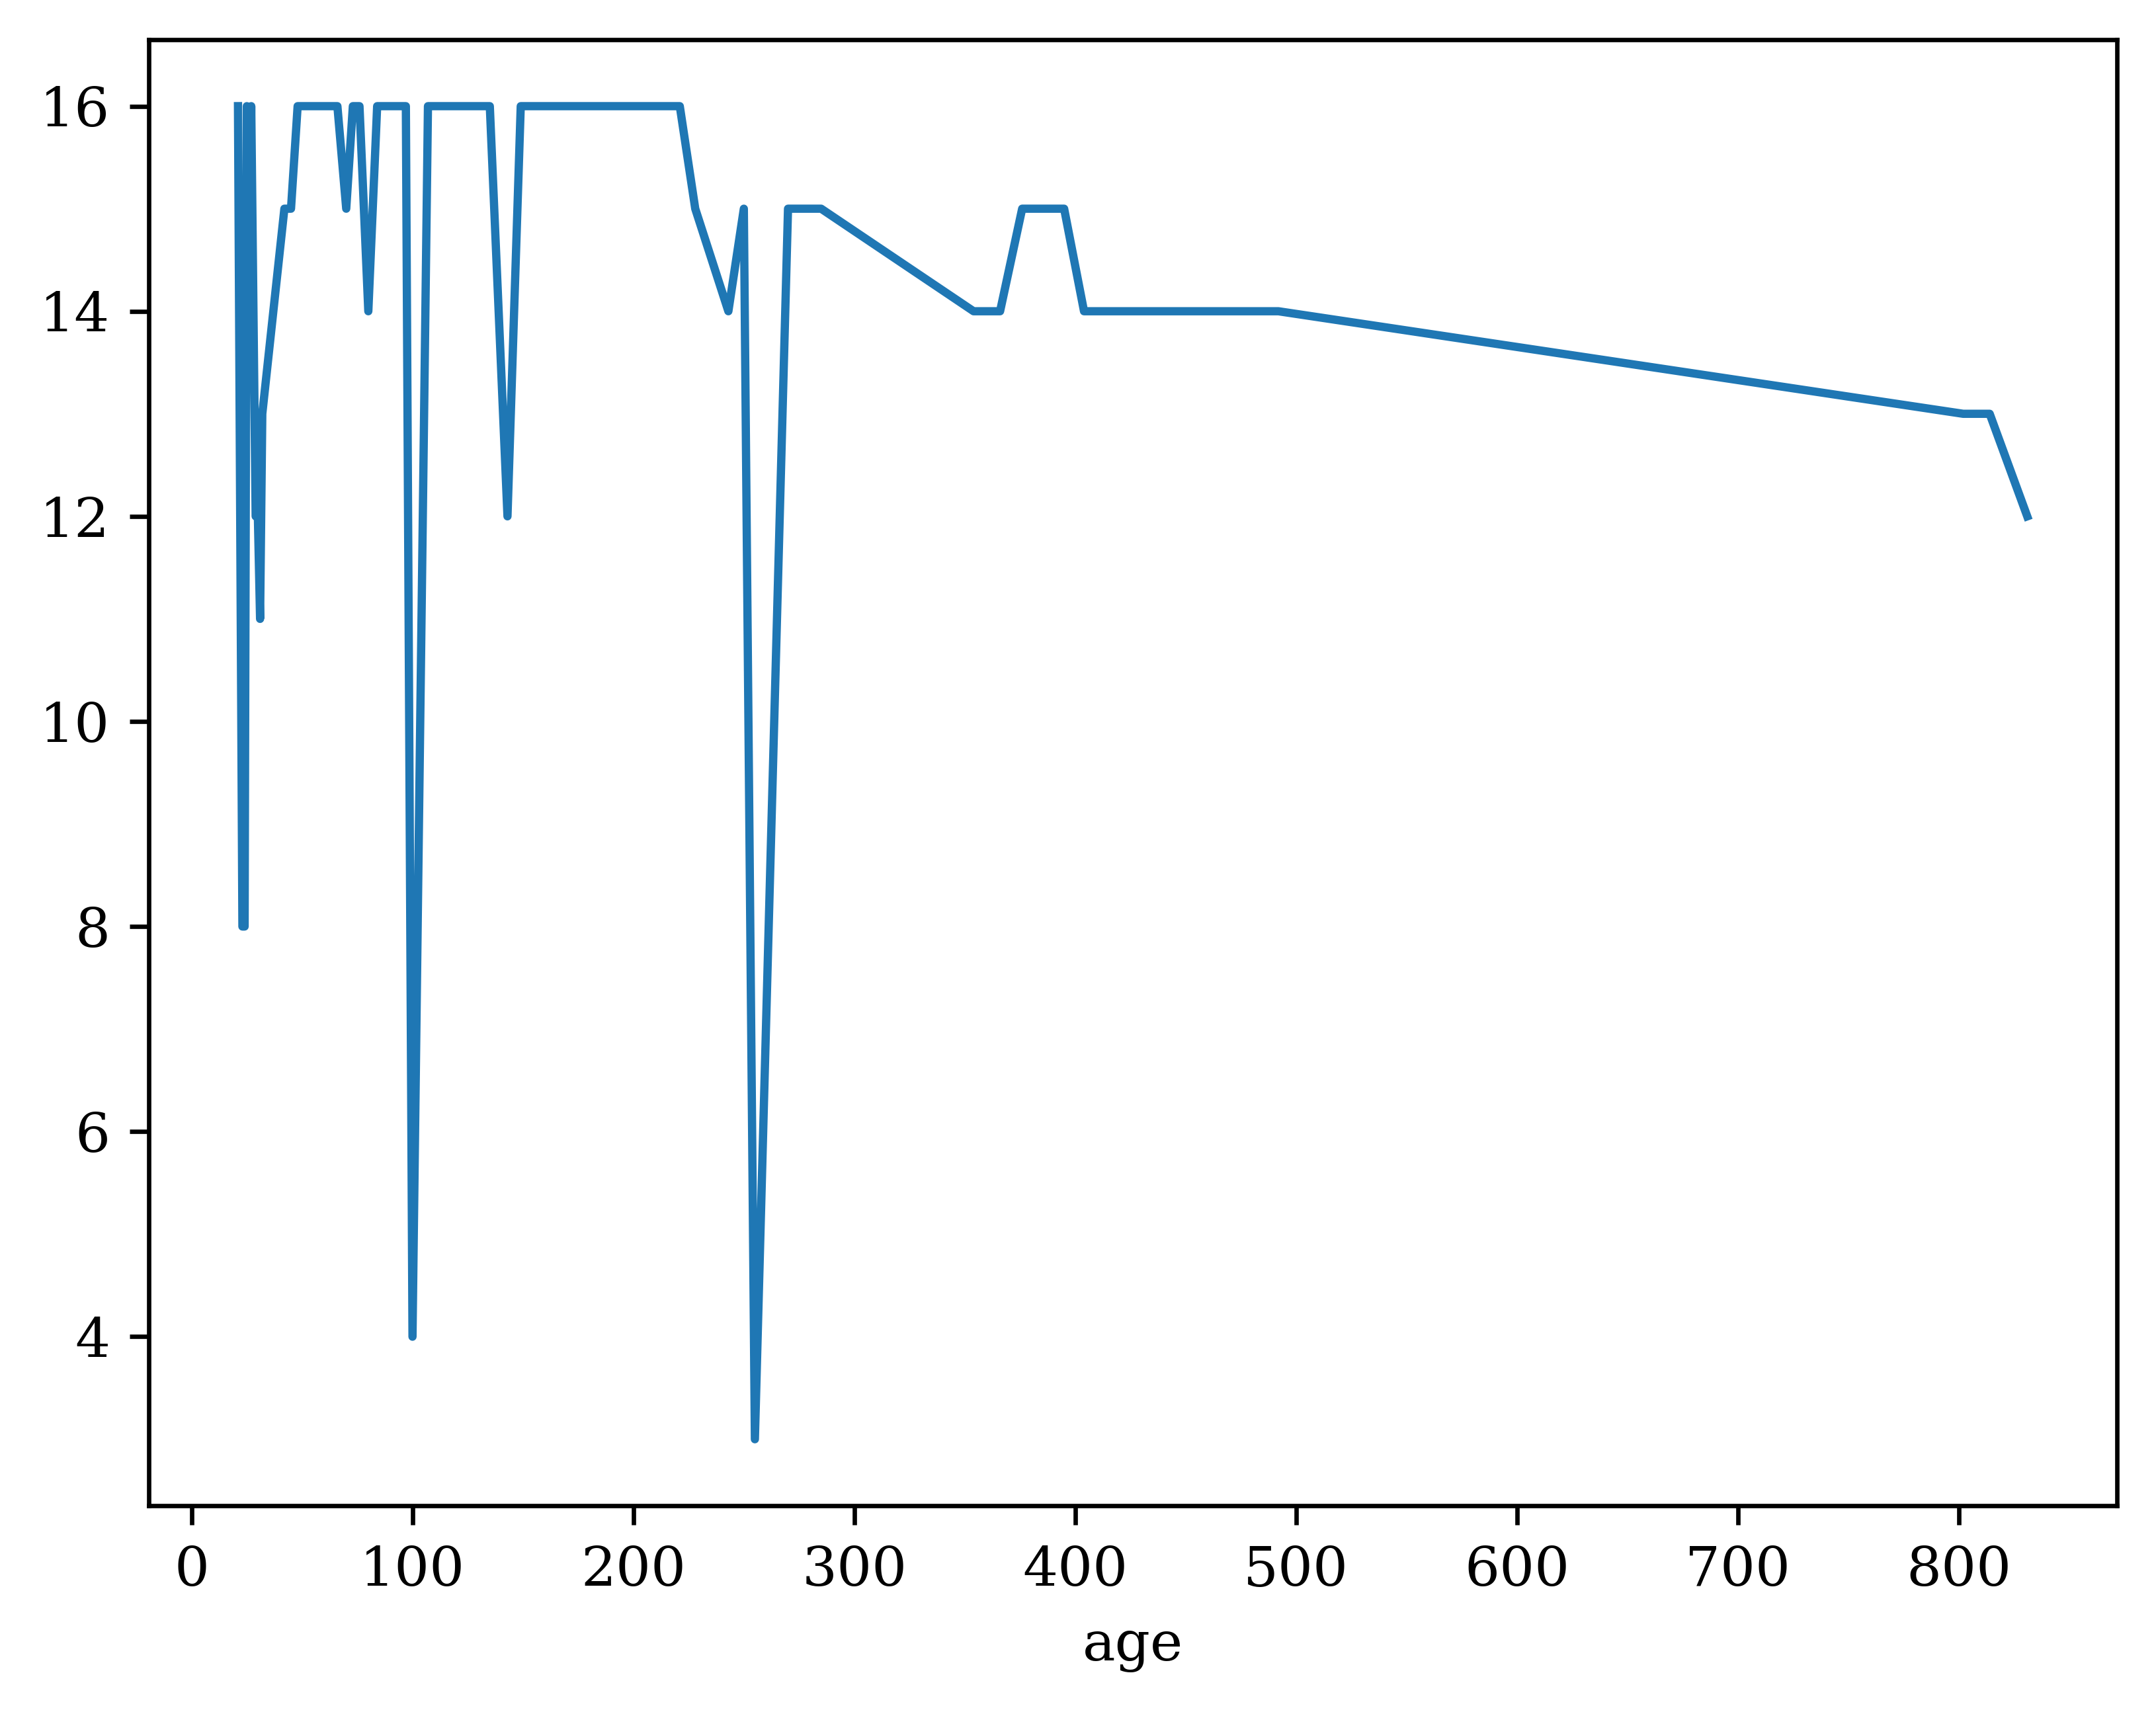

In [21]:
temp.groupby('age')['age'].count().plot()

In [22]:
# counter = Counter(temp["age"])
# thresh = 9
# remove_sessions = [k for k, v in counter.items() if v < thresh]
# usage_df = usage_df[~usage_df["age"].isin(remove_sessions)]

In [23]:
# define cage
usage_df['cage'] = usage_df.mouse.str[:2]

# some tests

In [24]:
# figure out if male and female data mixed by checking if for similar age we have a different session number
# calculate usage
temp = (
    usage_df.pivot_table(
        values="usage",
        columns="relabeled_syllables",
        index=["age", "uuid", "subject_name", "date"],
    )
    .fillna(0)
    .reset_index()
)

ages = temp.age.unique()
for age in ages:
    curr = temp[temp.age == age]
    sessions = curr.subject_name.str[-3:]  # get session number
    if len(sessions.unique()) > 1:  # if the same age has different session numbers
        curr_print = curr[["subject_name", "age", "date"]]
        print(curr_print)
        print(len(curr_print))

relabeled_syllables subject_name  age                date
28                     04_02_023   23 2021-04-01 16:54:55
29                     02_02_023   23 2021-04-01 15:28:56
30                      01_01_23   23 2021-04-01 14:48:07
31                      02_01_23   23 2021-04-01 15:28:49
32                      03_01_23   23 2021-04-01 16:10:58
33                     03_02_023   23 2021-04-01 16:11:07
34                     01_02_023   23 2021-04-01 14:48:19
35                      04_01_23   23 2021-04-01 16:54:47
8
relabeled_syllables subject_name  age                date
44                     02_01_025   25 2021-04-03 15:52:36
45                   01_03_025_1   25 2021-04-03 18:48:02
46                   02_02_025_1   25 2021-04-03 18:20:11
47                     04_01_025   25 2021-04-03 17:46:19
48                     02_04_025   25 2021-04-03 15:52:59
49                     04_02_025   25 2021-04-03 17:46:30
50                     04_03_025   25 2021-04-03 17:46:45
51          

## exclude uuids

In [25]:
uuids = ['2fd842cd-c65b-4215-a4e0-a9ffb54ccc3e']
# related to date:
exclude_dates = [pd.Timestamp('2021-10-16 17:00:57')]

## save dataframe

In [26]:
usage_mtx = usage_df.pivot_table(
    values="usage",
    columns="relabeled_syllables",
    index=["age", "mouse", "cage", "uuid", "subject_name", "date"],
).fillna(0)
usage_mtx.to_parquet(data_folder / "longtogeny_males_clean_v1.parquet", engine="pyarrow")

In [27]:
# check number of sessions per age
temp = (
    usage_df.pivot_table(
        values="usage",
        columns="relabeled_syllables",
        index=["age", "uuid", "subject_name", "date"],
    )
    .fillna(0)
    .reset_index()
)
counter = Counter(temp["age"])
counter

Counter({21: 16,
         25: 16,
         27: 16,
         48: 16,
         55: 16,
         58: 16,
         62: 16,
         66: 16,
         73: 16,
         76: 16,
         84: 16,
         87: 16,
         90: 16,
         93: 16,
         97: 16,
         107: 16,
         114: 16,
         121: 16,
         128: 16,
         135: 16,
         149: 16,
         157: 16,
         165: 16,
         183: 16,
         194: 16,
         199: 16,
         206: 16,
         215: 16,
         221: 16,
         42: 15,
         45: 15,
         70: 15,
         228: 15,
         250: 15,
         270: 15,
         285: 15,
         376: 15,
         381: 15,
         385: 15,
         395: 15,
         26: 14,
         28: 14,
         80: 14,
         243: 14,
         354: 14,
         360: 14,
         366: 14,
         404: 14,
         411: 14,
         418: 14,
         431: 14,
         439: 14,
         449: 14,
         460: 14,
         468: 14,
         479: 14,
         488:

In [28]:
counter = Counter(temp["age"])
thresh = 9
remove_sessions = [k for k, v in counter.items() if v < thresh]
usage_df = usage_df[~usage_df["age"].isin(remove_sessions)]

In [29]:
# check number of sessions per age
temp = (
    usage_df.pivot_table(
        values="usage",
        columns="relabeled_syllables",
        index=["age", "uuid", "subject_name", "date"],
    )
    .fillna(0)
    .reset_index()
)
counter = Counter(temp["age"])
counter

Counter({21: 16,
         25: 16,
         27: 16,
         48: 16,
         55: 16,
         58: 16,
         62: 16,
         66: 16,
         73: 16,
         76: 16,
         84: 16,
         87: 16,
         90: 16,
         93: 16,
         97: 16,
         107: 16,
         114: 16,
         121: 16,
         128: 16,
         135: 16,
         149: 16,
         157: 16,
         165: 16,
         183: 16,
         194: 16,
         199: 16,
         206: 16,
         215: 16,
         221: 16,
         42: 15,
         45: 15,
         70: 15,
         228: 15,
         250: 15,
         270: 15,
         285: 15,
         376: 15,
         381: 15,
         385: 15,
         395: 15,
         26: 14,
         28: 14,
         80: 14,
         243: 14,
         354: 14,
         360: 14,
         366: 14,
         404: 14,
         411: 14,
         418: 14,
         431: 14,
         439: 14,
         449: 14,
         460: 14,
         468: 14,
         479: 14,
         488:

In [30]:
usage_df = usage_df.query('age<600')

In [31]:
usage_df.age.unique()

<ArrowExtensionArray>
[ 21,  22,  25,  26,  27,  28,  29,  30,  31,  32,  42,  45,  48,  55,  58,
  62,  66,  70,  73,  76,  80,  84,  87,  90,  93,  97, 107, 114, 121, 128,
 135, 143, 149, 157, 165, 183, 194, 199, 206, 215, 221, 228, 243, 250, 270,
 285, 354, 360, 366, 376, 381, 385, 395, 404, 411, 418, 431, 439, 449, 460,
 468, 479, 488, 492]
Length: 64, dtype: int32[pyarrow]

In [32]:
usage_mtx = usage_df.pivot_table(
    values="usage",
    columns="relabeled_syllables",
    index=["age", "mouse", "cage", "uuid", "subject_name", "date"],
).fillna(0)
usage_mtx.to_parquet(data_folder / "longtogeny_males_clean_v2.parquet", engine="pyarrow")